# Init

In [2]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import glob
from scipy.spatial.distance import euclidean, pdist, squareform
import sys
sys.path.append(os.environ['CAPSTONE_PYTHON_SOURCE'])
#setting path to the env variable
folder = os.environ['CAPSTONE_DATA']
folder

'C:\\max\\Google Drive Max\\Max Shared\\Master Data Science\\2020-05 Capstone A\\msds_capstone\\data\\'

# Create Similarity Dataframe

In [4]:
from similarity.similarity import calcSimilarity, getMatrix
from ETL.ETL import loadDataset

In [5]:
import spacy 
import spacy.cli
### SPACY INITIAL SETUP ###
#run in terminal:  python -m spacy download en_core_web_lg
spacy.cli.download("en_core_web_lg")

### load NLP ###
nlp = spacy.load('en_core_web_lg')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


## Loading and filtering

In [6]:
#dataRaw= pd.read_pickle(os.path.join(folder,'tidy_data/Transactions_v2/Transactions.pkl'))
dataRaw= loadDataset(version=4)
data=dataRaw[dataRaw['Category (CatMan)'].isin(['SUP PREM WHISKEY','ECONOMY VODKA'])]
print(data.shape)
plt.style.use('default')
data.head(1)

(19735, 34)


,WeekID,Year,WeekDate,Chain Master ID,Chain Master,Category (CatMan),Product,Product ID,Beverage Type,ASW Product #,...,Alcohol Proof,Qty Per Case,Size Liters,STD. Cases,Dollar Sales,9L Cases,Bottles,Transactions,Dollar Sales per Case,Dollar Sales per 9L Case
0,1,2013,2013-01-03,1577,THE BARREL HOUSE,ECONOMY VODKA,MCCORMICK CHERRY VODKA 60 1L,82970,SPIRITS,34347348,...,60.0,12,0.1,2.0,121.54,2.66,24.0,1,60.77,45.691729


In [7]:
datat= data[(data['Category (CatMan)'] == 'SUP PREM WHISKEY') & (data['Chain Master']=='SPECS')] 
datat.shape


(5725, 34)

## Similarity Matrix

Based on how many times two products have been bought together in the same month

### Testing text similarity

In [23]:
import textdistance #https://pypi.org/project/textdistance/
from similarity.similarity import spacy_similarity
t1='MCCORMICK APPLE VODKA 60  1L'
t2= 'TAAKA APL VODKA  1L'
print('Levenshtein: ',textdistance.levenshtein.normalized_similarity(t1,t2))
print('Cosine:      ',textdistance.cosine.normalized_similarity(t1,t2))
print('Jaccard:     ',textdistance.jaccard.normalized_similarity(t1,t2))
print('NLP Spacy:   ',spacy_similarity(t1,t2,nlp))


Levenshtein:  0.5
Cosine:       0.65033247714309
Jaccard:      0.46875
NLP Spacy:    0.7222400280225594


**Testing Matrix**

In [24]:
if False:
    t=data[(data['Chain Master']=='WESTERN BEV LIQ TX') & (data['Category (CatMan)']=='ECONOMY VODKA')]
    ##getting just the matrix##
    m=getMatrix(t,periodCol='WeekDate')
    m.head(5)

**Testing a Product**

In [25]:
if False:
    #t=data[(data['Chain Master']=='THE BARREL HOUSE') & (data['Category (CatMan)']=='SUP PREM WHISKEY')]
    t=data[(data['Category (CatMan)']=='SUP PREM WHISKEY')]
    t.shape
    df = calcSimilarity(t,doNLP=True,nlp=nlp,periodCol='WeekDate')
    df['Events_NLP_1'] = df['EventsNorm'] *  df['TextNLP'] #testing calc
    df['Events_NLP_2'] =  (df['EventsNorm']*.8) +(df['TextNLP']*.2)

In [26]:
if False:
    display(df.groupby(['Product'])['Events'].sum().sort_values(ascending=False).head(5))
    display(df[df['Product']=='JACK DANIELS BLK WHSKY  1L'].sort_values('Events_NLP_2',ascending=False)[0:5])


## Running for entire DataFrame
by Chain and Category


In [27]:
#from pandarallel import pandarallel
#pandarallel.initialize()
CreateSim = False

In [28]:
if CreateSim:
    dfSimilarity = (data.groupby(['Chain Master','Category (CatMan)'])
                .apply(calcSimilarity,doNLP=True,nlp=nlp,periodCol='WeekDate')
                .reset_index())


In [29]:
if CreateSim:
    dfSimilarity['Events_NLP_old'] = dfSimilarity['EventsNorm'] *  dfSimilarity['TextNLP']
    dfSimilarity['Events_NLP'] = (dfSimilarity['EventsNorm']*.8) +(dfSimilarity['TextNLP']*.2)
    dfSimilarity=dfSimilarity.drop('level_2',axis=1)
    dfSimilarity

In [30]:
#testing
if CreateSim:
    dfSimilarity[(dfSimilarity['Product']=='JACK DANIELS BLK WHSKY  1L') & (dfSimilarity['Product2']=='JACK DANIELS TENN HNY WHSKY  1L')]


### Saving to file

In [31]:
if CreateSim:
    dfSimilarity.to_pickle(os.path.join(folder,'tidy_data/Transactions_v4/Similarity.pkl'))
    dfSimilarity.to_csv(os.path.join(folder,'tidy_data/Transactions_v4/Similarity.csv'))
    dfSimilarity.to_excel(os.path.join(folder,'tidy_data/Transactions_v4/Similarity.xlsx'))

## All Chains

In [32]:
if CreateSim:
    dfSimilarityAll = (data.groupby(['Category (CatMan)'])
                .apply(calcSimilarity,doNLP=True,nlp=nlp,periodCol='WeekDate')
                .reset_index())
    dfSimilarityAll['Chain Master']=''
    dfSimilarityAll=dfSimilarityAll.drop('level_1',axis=1)
    dfSimilarityAll

In [36]:
if CreateSim:
    dfSimilarityAll['Events_NLP_old'] = dfSimilarityAll['EventsNorm'] *  dfSimilarityAll['TextNLP']
    dfSimilarityAll['Events_NLP'] = (dfSimilarityAll['EventsNorm']*.8) +(dfSimilarityAll['TextNLP']*.2)



In [37]:
if CreateSim:
    dfSimilarityAll[(dfSimilarityAll['Product']=='JACK DANIELS BLK WHSKY  1L') & (dfSimilarityAll['Product2']=='JACK DANIELS TENN HNY WHSKY  1L')]

In [38]:
from similarity.similarity import topSimilar
if CreateSim:
    topSimilar(dfSimilarityAll,ChainMaster='',Product='JACK DANIELS BLK WHSKY  1L',topn=5,pivot=False)

### Saving to file

In [39]:
if CreateSim:
    dfSimilarityAll.to_pickle(os.path.join(folder,'tidy_data/Transactions_v4/Similarity_allCustomers.pkl'))
    dfSimilarityAll.to_csv(os.path.join(folder,'tidy_data/Transactions_v4/Similarity_allCustomers.csv'))
    dfSimilarityAll.to_excel(os.path.join(folder,'tidy_data/Transactions_v4/Similarity_allCustomers.xlsx'))

# Read Similarity Dataframe

In [40]:
import sys, os
sys.path.append(os.environ['CAPSTONE_PYTHON_SOURCE'])
from similarity.similarity import loadSimilarity

dfSimilarity2 = loadSimilarity(version=4)
dfSimilarityAll2 = loadSimilarity(version=4,allCustomers=True)


# Top N similar Products

In [9]:
from similarity.similarity import topSimilar
dfSimilarity2[(dfSimilarity2['Product']=='JACK DANIELS BLK WHSKY  1L') & (dfSimilarity2['Product2']=='JACK DANIELS TENN HNY WHSKY  1L')]

,Chain Master,Category (CatMan),Product,Product2,Similarity,Events,EventsNorm,TextCosine,TextLev,TextNLP,Events_NLP_old,Events_NLP
5123,SPECS,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,JACK DANIELS TENN HNY WHSKY 1L,0.016927,313,0.915205,0.81014,0.741935,0.814846,0.745751,0.895133
29209,THE BARREL HOUSE,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,JACK DANIELS TENN HNY WHSKY 1L,0.011421,18,0.211765,0.81014,0.741935,0.814846,0.172556,0.332381
52777,WESTERN BEV LIQ TX,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,JACK DANIELS TENN HNY WHSKY 1L,0.002297,127,0.391975,0.81014,0.741935,0.814846,0.319399,0.476549


In [10]:
topSimilar(dfSimilarity2,ChainMaster='',Product='JACK DANIELS BLK WHSKY  1L',topn=5,pivot=False)

,Chain Master,Category (CatMan),Product,Product2,Similarity,Events,EventsNorm,TextCosine,TextLev,TextNLP,Events_NLP_old,Events_NLP
5123,SPECS,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,JACK DANIELS TENN HNY WHSKY 1L,0.016927,313,0.915205,0.810140,0.741935,0.814846,0.745751,0.895133
5124,SPECS,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,GENTLEMAN JACK WHSKY 6PK 1L,0.009938,289,0.845029,0.754851,0.370370,0.752074,0.635525,0.826438
5125,SPECS,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,JACK DANIELS BLK WHSKY 1.75L,0.006059,269,0.786550,0.946864,0.896552,0.923620,0.726473,0.813964
5126,SPECS,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,JACK DANIELS BLK WHSKY 750M,0.005693,261,0.763158,0.889499,0.857143,0.798838,0.609639,0.770294
5127,SPECS,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,JACK DANIELS TENN HNY WHSKY 750M,0.004019,231,0.675439,0.716928,0.636364,0.736016,0.497134,0.687554


## All Chains

In [11]:
dfSimilarityAll2[(dfSimilarityAll2['Product']=='JACK DANIELS BLK WHSKY  1L') & (dfSimilarityAll2['Product2']=='JACK DANIELS TENN HNY WHSKY  1L')]

,Category (CatMan),Product,Product2,Similarity,Events,EventsNorm,TextCosine,TextLev,TextNLP,Chain Master,Events_NLP_old,Events_NLP
14369,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,JACK DANIELS TENN HNY WHSKY 1L,0.010662,334,0.92011,0.81014,0.741935,0.814846,,0.749748,0.899057


In [12]:
topSimilar(dfSimilarityAll2,ChainMaster='',Product='JACK DANIELS BLK WHSKY  1L',topn=5,pivot=False)

,Category (CatMan),Product,Product2,Similarity,Events,EventsNorm,TextCosine,TextLev,TextNLP,Chain Master,Events_NLP_old,Events_NLP
14369,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,JACK DANIELS TENN HNY WHSKY 1L,0.010662,334,0.920110,0.810140,0.741935,0.814846,,0.749748,0.899057
14372,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,JACK DANIELS BLK WHSKY 1.75L,0.006756,316,0.870523,0.946864,0.896552,0.923620,,0.804033,0.881143
14371,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,JACK DANIELS BLK WHSKY 750M,0.007898,323,0.889807,0.889499,0.857143,0.798838,,0.710812,0.871613
14370,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,GENTLEMAN JACK WHSKY 6PK 1L,0.008405,326,0.898072,0.754851,0.370370,0.752074,,0.675416,0.868872
14373,SUP PREM WHISKEY,JACK DANIELS BLK WHSKY 1L,JACK DANIELS TENN HNY WHSKY 750M,0.005747,310,0.853994,0.716928,0.636364,0.736016,,0.628554,0.830399


# TopProducts

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


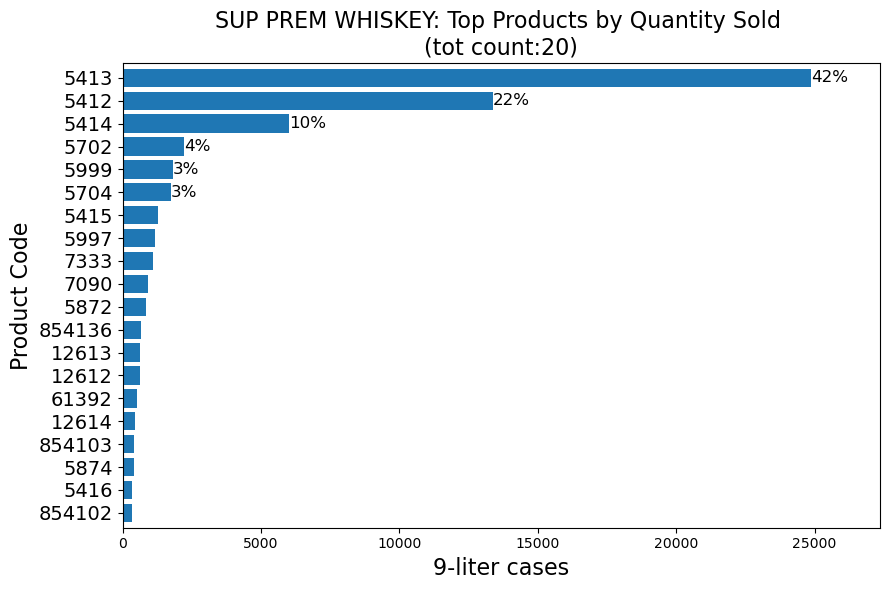

In [13]:
#cols = data.select_dtypes('object').columns
%load_ext autoreload
%autoreload 2
from similarity.similarity import getHeatmap
from similarity.similarity import loadSimilarity
from ETL.ETL import getTopProducts
dfSimilarity2 = loadSimilarity(version=4)
dataRaw2= loadDataset(version=4)
prodEncoder = dataRaw2.groupby(['Product'])['Product ID'].first().to_dict()
cats=data['Category (CatMan)'].unique()
cats=['SUP PREM WHISKEY']
rows = len(cats)
plt.figure(figsize=(9,6*rows))
maxOut = 20

for icat,cat in enumerate(cats):
    plt.subplot(rows,1,icat+1)
    topP = getTopProducts(dataRaw2,ChainMaster = '',ProdCat = cat,field='9L Cases',topN=maxOut)
    topPID = [prodEncoder[x] for x in topP]
    vQ =  (data[data['Product ID'].isin(topPID)]
           .groupby('Product ID')['9L Cases']
           .sum()
           .sort_values(ascending=True))
    #display(vQ / sum(vQ))
    plt.title(cat+': Top Products by Quantity Sold \n(tot count:' + str(vQ.shape[0]) + (', top ' + str(maxOut)  if vQ.shape[0]>maxOut else '' ) + ')',size=16)
    plt.tick_params(axis='y',labelsize=14)
    plt.xlabel('9-liter cases',size=16)
    plt.xlim(0,max(vQ)*1.1)
    vQ.tail(maxOut).plot(kind='barh',width=.8)
    plt.ylabel('Product Code',size=16)
    for it,t in enumerate(vQ.tail(maxOut).index):
        perc = str(int(round(vQ[t] / sum(vQ)*100,0))) + '%'
        if t in (vQ.tail(6).index):  plt.text(vQ[t],it-.2,perc,size=12)

    #plt.text(1,1,'test')
    
plt.tight_layout()



# Heat Map

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

CUST: PROD:ECONOMY VODKA
[854283, 854495, 854778]
Product2    854283    854495    854778
Product                               
854283    1.000000  0.634202  0.218497
854495    0.634202  1.000000  0.241428
854778    0.655492  0.724283  1.000000
CUST: PROD:SUP PREM WHISKEY
[5413, 5412, 5414]
Product2      5413      5412      5414
Product                               
5413      1.000000  0.923620  0.798838
5412      0.923620  1.000000  0.852094
5414      0.798838  0.852094  1.000000
WESTERN BEV LIQ TX
CUST:WESTERN BEV LIQ TX PROD:ECONOMY VODKA
[854283, 854778, 854495]
Product2    854283    854778    854495
Product                               
854283    1.000000  0.655492  0.634202
854778    0.655492  1.000000  0.724283
854495    0.634202  0.724283  1.000000
CUST:WESTERN BEV LIQ TX PROD:SUP PREM WHISKEY
[5412, 5414, 5413]
Product2      5412      5414      5413
Product                               

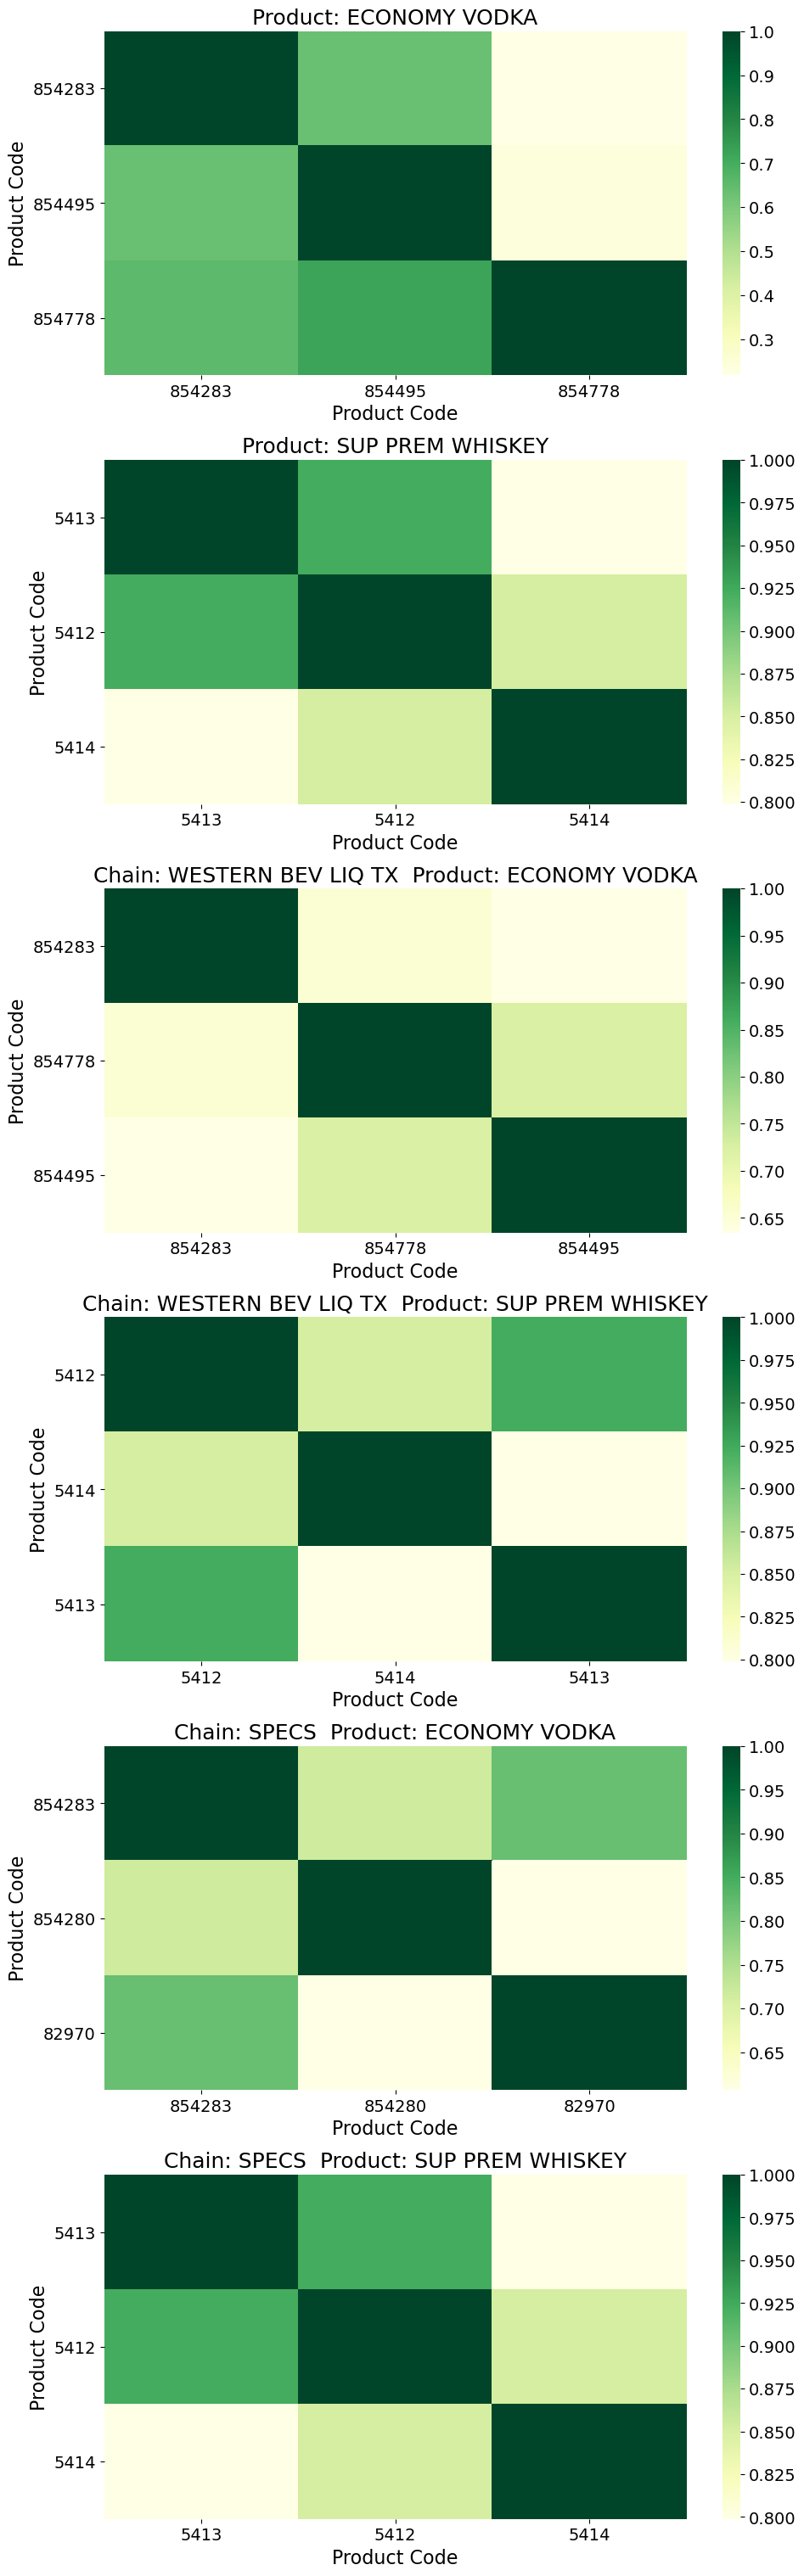

In [51]:
%load_ext autoreload
%autoreload 2
from similarity.similarity import getHeatmap
from similarity.similarity import loadSimilarity
from ETL.ETL import getTopProducts
dfSimilarity2 = loadSimilarity(version=4)
dataRaw2= loadDataset(version=4)
#prodEnc = dataRaw.groupby(['Product'])['Product ID'].first().to_dict()
custs= ['','WESTERN BEV LIQ TX','SPECS','INDEPENDENTS']# dfSimilarity['Chain Master'].unique()
maxc =len(custs)
maxp = dfSimilarity2['Category (CatMan)'].nunique()
plt.figure(figsize=(10,5*maxc*maxp))
prodEncoder = dataRaw2.groupby(['Product'])['Product ID'].first().to_dict()
import seaborn as sns
for ic,c in enumerate(custs):
    prods = dfSimilarity2[(dfSimilarity2['Chain Master']==c) | (c=='')]['Category (CatMan)'].unique()
    #prods = ["SUP PREM WHISKEY"]
    print(c)
    for ip,p in enumerate(prods):
        print("CUST:" + c + " PROD:" + p)
        prodsList = getTopProducts(dataRaw2,ChainMaster = c, ProdCat = p,topN=3,field = '9L Cases')
        print([prodEncoder[x] for x in prodsList])
        plt.subplot(maxc*maxp,1,(ic)*maxp+(ip)+1)
        ax,mtrx=getHeatmap(dfSimilarity2,ChainMaster = c,prodCat = p,size=15,norm=True,encoder=prodEncoder,prodsList = prodsList)
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=14)
        if(c!=''):
            plt.title('Chain: ' + c +'  Product: ' + p,size=18)
        else:
            plt.title('Product: ' + p,size=18)
        plt.tick_params(axis='y',labelsize=14,labelrotation =0)
        plt.tick_params(axis='x',labelsize=14)
        plt.xlabel('Product Code',size=16)
        plt.ylabel('Product Code',size=16)
        print(mtrx)
plt.tight_layout()
